In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_frame = pd.read_csv("advertising.csv")

In [3]:
data_frame.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
data_frame.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
X = data_frame.iloc[:,:3].values

In [7]:
X.shape

(200, 3)

In [8]:
y = data_frame.iloc[:,-1:].values


In [9]:
temp = np.ones((200,1))

In [10]:
X = np.concatenate((X, temp), axis = 1)

# Solving Problem

In [11]:
def create_random_value(bound = 10):
    return (random.random() - 0.5)*bound

In [12]:
n = 4                  # size of individual (chromosome); 3 coefficients and 1 bias
m = 600                # size of population
n_generations = 100   # number of generations
losses = []            # để vẽ biểu đồ quá trình tối ưu
individuals = []       # chứa các tham số trong quá trình training (theta)

In [13]:
def compute_loss(individual):
    theta = np.array(individual)
    y_hat = np.dot(X,individual)
    return np.multiply(y - y_hat , y - y_hat).mean()

In [14]:
def compute_fitness(individual):
    loss = compute_loss(individual)
    return 1/(loss + 0.00001)

In [15]:
def create_individual():
    return [create_random_value() for _ in range(n)]

In [16]:
def crossover(individual1 , individual2, cr = 0.9):
    individual_1 = individual1.copy()
    individual_2 = individual2.copy()
    for i in range(n):
        if(random.random() < cr):
            individual_1[i] , individual_2[i] = individual2[i], individual1[i] 
    return individual_1, individual_2

In [17]:
def mutate(individual , mr = 0.05):
    individual_new = individual.copy()
    for i in range(n):
        if(random.random() < mr):
            individual_new[i] = create_random_value()
    return individual_new

In [18]:
def selection(sorted_population):
    ind1 = random.randint(0 , m -1)
    while True:
        ind2 = random.randint(0 , m-1)
        if(ind1 != ind2):
            break
                
    individual_s = sorted_population[ind1]
    if ind2 > ind1:
        individual_s = sorted_population[ind2]
    
    return individual_s 

In [19]:
def create_new_population(old_population, elitism = 2, gen = 1):
    sorted_population = sorted(old_population , key = compute_fitness)
    
    if (gen % 1 ==0):
        losses.append(compute_loss(sorted_population[m - 1]))
        print(f"Best lost: {compute_loss(sorted_population[m-1])} - Individual: {sorted_population[m-1]}")
    new_population = []
    while(len(new_population) < m - elitism):
        individual1 = selection(sorted_population)
        individual2 = selection(sorted_population)
        
        individual1_cr , individual2_cr = crossover(individual1 , individual2)
        
        individual1_m = mutate(individual1_cr)
        individual2_m = mutate(individual2_cr)
        
        new_population.append(individual1_m)
        new_population.append(individual2_m)
    
    for ind in sorted_population[m-elitism:]:
        new_population.append(ind.copy())
    return new_population

In [20]:
population = [create_individual() for _ in range(m)]
for i in range(n_generations):
    population = create_new_population(population, 2, i)

Best lost: 1155.3427823697848 - Individual: [-0.1278502156498318, 2.181494214339623, -0.31362766108001594, 2.9465817359348234]
Best lost: 457.07700125917995 - Individual: [0.20518963457107797, -0.14529483204740457, -0.4458063024843384, -3.5854375053374863]
Best lost: 457.07700125917995 - Individual: [0.20518963457107797, -0.14529483204740457, -0.4458063024843384, -3.5854375053374863]
Best lost: 457.07700125917995 - Individual: [0.20518963457107797, -0.14529483204740457, -0.4458063024843384, -3.5854375053374863]
Best lost: 376.6974830649244 - Individual: [0.07294076073813716, -0.9441781683362915, 0.7600196918803215, 4.927267965900073]
Best lost: 61.29459593983881 - Individual: [0.040274177967530855, -0.10993949028392125, 0.08738510074288275, 4.921619465568284]
Best lost: 61.29459593983881 - Individual: [0.040274177967530855, -0.10993949028392125, 0.08738510074288275, 4.921619465568284]
Best lost: 61.29459593983881 - Individual: [0.040274177967530855, -0.10993949028392125, 0.087385100742

Best lost: 43.15894451014221 - Individual: [0.022296645380958102, 0.12609633677262644, 0.07890388777130664, 4.9980632999411725]
Best lost: 43.15879960571964 - Individual: [0.022296645380958102, 0.12609633677262644, 0.07890388777130664, 4.998111296679033]
Best lost: 43.15879960571964 - Individual: [0.022296645380958102, 0.12609633677262644, 0.07890388777130664, 4.998111296679033]
Best lost: 43.15879960571964 - Individual: [0.022296645380958102, 0.12609633677262644, 0.07890388777130664, 4.998111296679033]
Best lost: 43.15879960571964 - Individual: [0.022296645380958102, 0.12609633677262644, 0.07890388777130664, 4.998111296679033]
Best lost: 43.15879960571964 - Individual: [0.022296645380958102, 0.12609633677262644, 0.07890388777130664, 4.998111296679033]
Best lost: 43.15879960571964 - Individual: [0.022296645380958102, 0.12609633677262644, 0.07890388777130664, 4.998111296679033]
Best lost: 43.15879960571964 - Individual: [0.022296645380958102, 0.12609633677262644, 0.07890388777130664, 4.

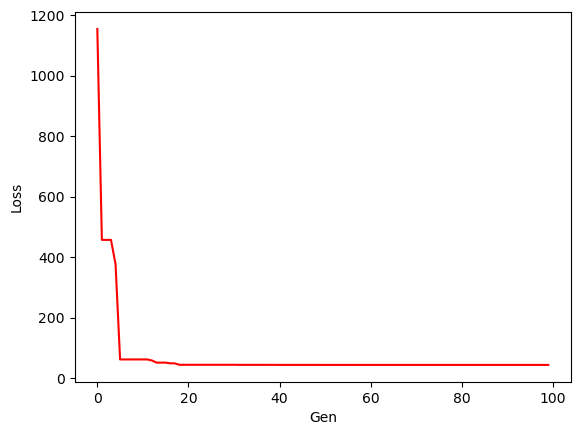

In [21]:
plt.plot(losses, c = "red")
plt.xlabel("Gen")
plt.ylabel("Loss")
plt.show()